In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm
from pandas.plotting import register_matplotlib_converters
%matplotlib inline

In [11]:
register_matplotlib_converters()
#for datetime conversion and plotting in matplotlib

In [2]:
df = pd.read_csv('PLUG.csv')
#data from yahoo finance, Nov 2019 to Nov 2020

# EDA

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-11-25,3.47,3.81,3.42,3.7,3.7,17256400
1,2019-11-26,3.73,3.91,3.67,3.9,3.9,13586900
2,2019-11-27,3.99,4.04,3.92,4.0,4.0,13575100
3,2019-11-29,3.99,3.99,3.73,3.9,3.9,6699500
4,2019-12-02,3.91,4.01,3.66,3.8,3.8,10259600


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
Date         252 non-null object
Open         252 non-null float64
High         252 non-null float64
Low          252 non-null float64
Close        252 non-null float64
Adj Close    252 non-null float64
Volume       252 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [5]:
#convert date from object to date time

In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df.info()
#date is now datetime!!!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
Date         252 non-null datetime64[ns]
Open         252 non-null float64
High         252 non-null float64
Low          252 non-null float64
Close        252 non-null float64
Adj Close    252 non-null float64
Volume       252 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.9 KB


(array([18262., 18322., 18383., 18444., 18506., 18567.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

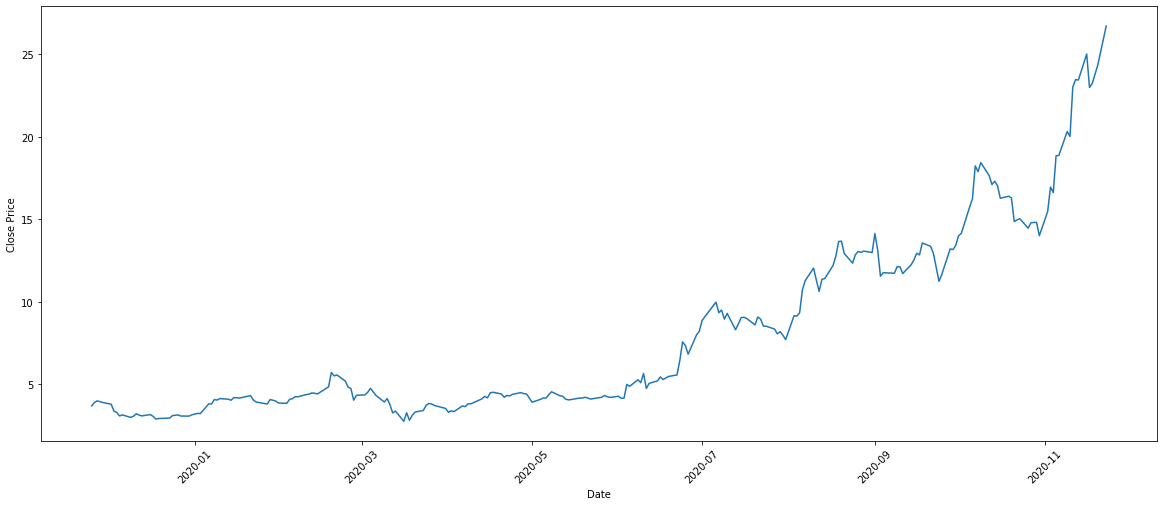

In [12]:
plt.figure(figsize=(20,8))

plt.plot('Date','Close',data=df)

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)

### The stock grew significantly in the last half of 2020. 

# Daily Percentage Change

In [13]:
df['Daily Lag'] = df['Adj Close'].shift(1)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Lag
0,2019-11-25,3.47,3.81,3.42,3.7,3.7,17256400,NaN
1,2019-11-26,3.73,3.91,3.67,3.9,3.9,13586900,3.7
2,2019-11-27,3.99,4.04,3.92,4.0,4.0,13575100,3.9
3,2019-11-29,3.99,3.99,3.73,3.9,3.9,6699500,4.0
4,2019-12-02,3.91,4.01,3.66,3.8,3.8,10259600,3.9


In [69]:
df['Daily Returns'] = (df['Daily Lag']/df['Adj Close']) -1
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Lag,Daily Returns,Total Traded,MA50,MA200,MA25,Cumulative Return
0,2019-11-25,3.47,3.81,3.42,3.7,3.7,17256400,NaN,NaN,59879708.0,NaN,NaN,NaN,NaN
1,2019-11-26,3.73,3.91,3.67,3.9,3.9,13586900,3.7,-0.051282,50679137.0,NaN,NaN,NaN,0.948718
2,2019-11-27,3.99,4.04,3.92,4.0,4.0,13575100,3.9,-0.025000,54164649.0,NaN,NaN,NaN,0.925000
3,2019-11-29,3.99,3.99,3.73,3.9,3.9,6699500,4.0,0.025641,26731005.0,NaN,NaN,NaN,0.948718
4,2019-12-02,3.91,4.01,3.66,3.8,3.8,10259600,3.9,0.026316,40115036.0,NaN,NaN,NaN,0.973684


<AxesSubplot:>

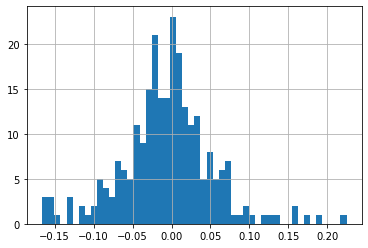

In [70]:
df['Daily Returns'].hist(bins=50)

<AxesSubplot:ylabel='Density'>

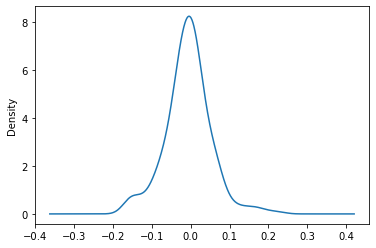

In [71]:
df['Daily Returns'].plot(kind='kde', label='PLUG')

In [72]:
mean = df['Daily Returns'].mean()
std = df['Daily Returns'].std()
print('mean =',mean)
print('standard deviation =',std)

mean = -0.0060907056415812925
standard deviation = 0.059181313487587914


### Standard deviation is low so the stock is not too volatile

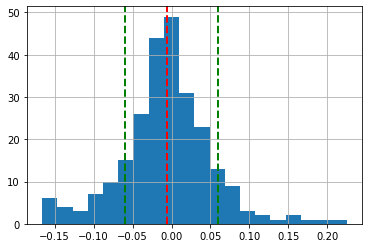

In [73]:
df['Daily Returns'].hist(bins=20)
plt.axvline(mean,color='red',linestyle='dashed',linewidth=2)

plt.axvline(std,color='g',linestyle='dashed',linewidth=2)
plt.axvline(-std,color='g',linestyle='dashed',linewidth=2)

#red line is the mean
#green lines are one standard deviation from the mean

In [74]:
df['Daily Returns'].kurtosis()

1.7974244706720506

### Kurtosis value is positive, so extreme values may be rare

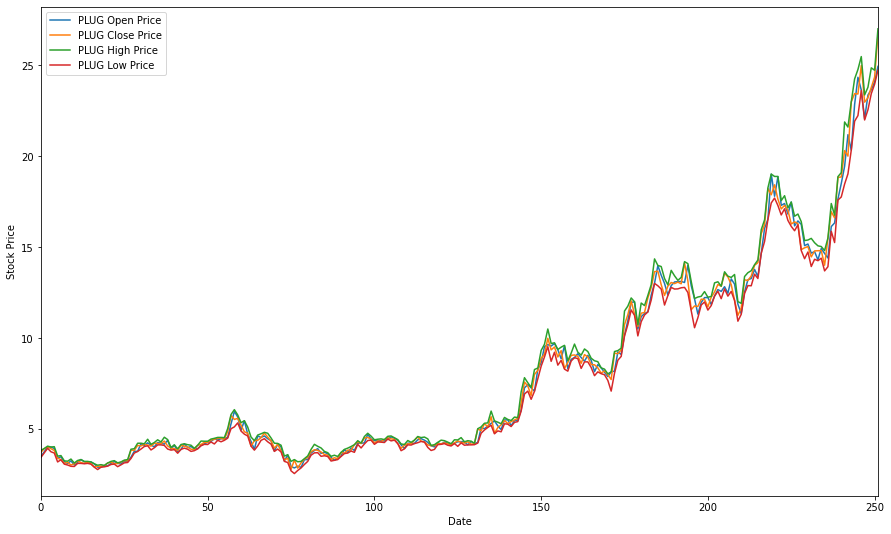

In [43]:
plt.figure(figsize=(15,9))

df['Open'].plot(label = 'PLUG Open Price')
df['Close'].plot(label = 'PLUG Close Price')
df['High'].plot(label = 'PLUG High Price')
df['Low'].plot(label = 'PLUG Low Price')

plt.ylabel('Stock Price')
plt.xlabel('Date')

plt.legend()

# Market Cap

In [44]:
df['Total Traded'] = df['Open']*df['Volume']
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Lag,Daily Returns,Total Traded
0,2019-11-25,3.47,3.81,3.42,3.7,3.7,17256400,NaN,NaN,59879708.0
1,2019-11-26,3.73,3.91,3.67,3.9,3.9,13586900,3.7,-0.051282,50679137.0
2,2019-11-27,3.99,4.04,3.92,4.0,4.0,13575100,3.9,-0.025000,54164649.0
3,2019-11-29,3.99,3.99,3.73,3.9,3.9,6699500,4.0,0.025641,26731005.0
4,2019-12-02,3.91,4.01,3.66,3.8,3.8,10259600,3.9,0.026316,40115036.0


<AxesSubplot:>

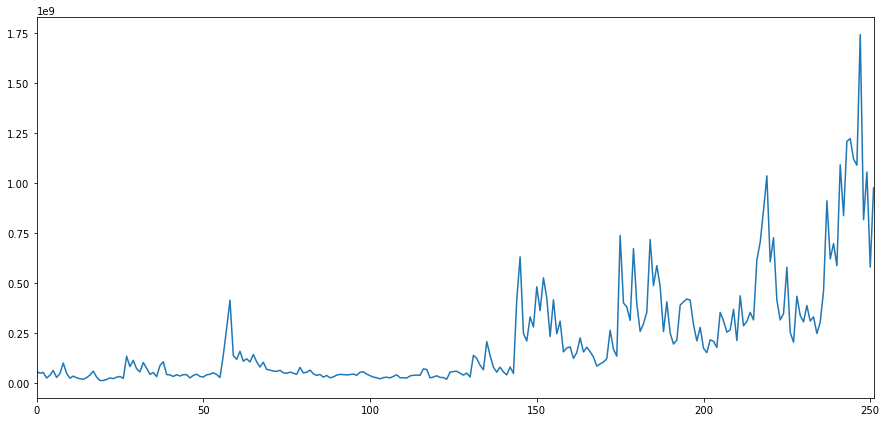

In [46]:
df['Total Traded'].plot(figsize=(15,7))

In [49]:
np.argmax(np.array(df['Total Traded']))

247

In [50]:
df.iloc[[np.argmax(np.array(df['Total Traded']))]]

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Lag,Daily Returns,Total Traded
247,2020-11-17,22.059999,23.379999,22.0,22.98,22.98,78945900,25.0,0.087903,1.741546e+09


# Moving Average

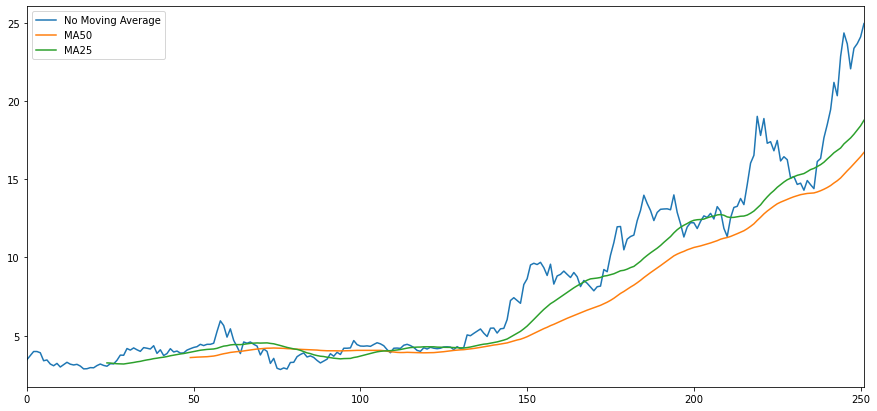

In [60]:
df['Open'].plot(label='No Moving Average',figsize=(15,7))

df['MA50'] = df['Open'].rolling(50).mean()
df['MA50'].plot(label='MA50')

df['MA25'] = df['Open'].rolling(25).mean()
df['MA25'].plot(label='MA25')

plt.legend()

# Cumulative Return

In [75]:
df['Cumulative Return'] = (1 + df['Daily Returns']).cumprod()

In [76]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Lag,Daily Returns,Total Traded,MA50,MA200,MA25,Cumulative Return
0,2019-11-25,3.47,3.81,3.42,3.7,3.7,17256400,NaN,NaN,59879708.0,NaN,NaN,NaN,NaN
1,2019-11-26,3.73,3.91,3.67,3.9,3.9,13586900,3.7,-0.051282,50679137.0,NaN,NaN,NaN,0.948718
2,2019-11-27,3.99,4.04,3.92,4.0,4.0,13575100,3.9,-0.025000,54164649.0,NaN,NaN,NaN,0.925000
3,2019-11-29,3.99,3.99,3.73,3.9,3.9,6699500,4.0,0.025641,26731005.0,NaN,NaN,NaN,0.948718
4,2019-12-02,3.91,4.01,3.66,3.8,3.8,10259600,3.9,0.026316,40115036.0,NaN,NaN,NaN,0.973684


Text(0.5, 1.0, 'Cumulative Return')

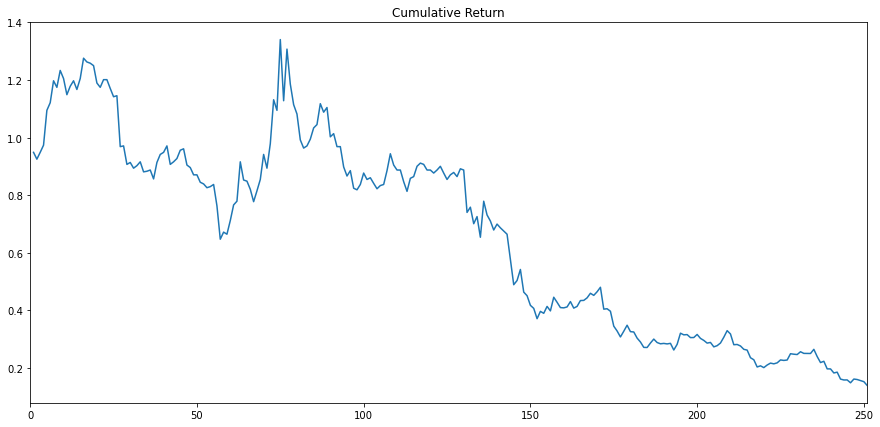

In [77]:
df['Cumulative Return'].plot(figsize=(15,7))
plt.title('Cumulative Return')

### One dollar in Nov 2019 is only worth about 0.10 in Nov 2020